In [91]:
#!pip install gensim
#!pip install plotly
!ls

HP_corpus.txt
HP1.csv
HP2.csv
HP3.csv
word2vec.ipynb


In [92]:
import pandas as pd
hp_texts = []

data_hp1 = pd.read_csv("HP1.csv",sep=";", encoding="unicode_escape")
data_hp2 = pd.read_csv("HP2.csv",sep=";", encoding="unicode_escape")
data_hp3 = pd.read_csv("HP3.csv",sep=";", encoding="unicode_escape")

hp1 = data_hp1.Sentence
hp2 = data_hp2.Sentence
hp3 = data_hp3.SENTENCE

hp_texts = [hp1, hp2, hp3]

In [93]:
corpus = []

#If you are running low on memory do this part using data streaming
for book in hp_texts:
    for line in book:
        corpus.append(line.encode("utf-8"))

In [94]:
corpus[0:10]

[b"I should've known that you would be here, Professor McGonagall.",
 b'Good evening, Professor Dumbledore.',
 b'Are the rumors true, Albus?',
 b"I'm afraid so, professor.",
 b'The good and the bad.',
 b'And the boy?',
 b'Hagrid is bringing him.',
 b'Do you think it wise to trust Hagrid with something as important as this?',
 b'Ah, Professor, I would trust Hagrid with my life.',
 b'Professor Dumbledore, sir.']

In [95]:
with open('HP_corpus.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % line for line in corpus)

In [97]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpusMemory(object, ):
    """An interator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = datapath('HP_corpus.txt')
        for line in corpus:
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [112]:
import gensim.models

sentences = MyCorpusMemory()
model = gensim.models.Word2Vec(sentences=sentences, size=200)

In [113]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

In [114]:
vec_harry = model.wv['harry']

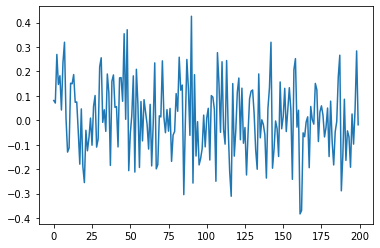

In [115]:
import matplotlib.pyplot as plt

plt.plot(vec_harry)